In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.api import VAR

df_songpa= pd.read_csv(r'C:\Users\sebiy\cp1\df_songpa.csv')

In [10]:
#송파구 

df_songpa['대여일자'] = df_songpa['대여일자'].replace('"','')
df_songpa = df_songpa.set_index('대여일자')

In [23]:
df_songpa.columns

Index(['가락동', '거여동', '마천동', '문정동', '방이동', '삼전동', '석촌동', '송파동', '신천동', '오금동',
       '잠실동', '장지동', '풍납동'],
      dtype='object')

In [11]:
final_diff = df_songpa.diff().dropna() #1차 차분

train = final_diff.iloc[:-30,:]  #train test split 한 달치 데이터가 테스트 데이터
test = final_diff.iloc[-30:,:]
print(train.shape)
print(test.shape)

(150, 13)
(30, 13)


In [33]:
# VAR 모델은 예측할 변수의 과거 값뿐만 아니라 예측할 변수와 의존성이 있는 변수 들까지 고려하여 예측함

model_songpa = VAR(train)

maxlags_songpa = 9 #가장 낮은 AIC score 를 주는 p 값
lagged_values_songpa = train.values[-9:] #9일 동안의 훈련

print(model_songpa.select_order(maxlags_songpa))

result_songpa = model_songpa.fit(maxlags=maxlags_songpa, ic='aic')
print(result_songpa.summary())

print(result_songpa.forecast(y= lagged_values_songpa, steps=30)) #향후 30일간을 예측


c:\Users\sebiy\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<statsmodels.tsa.vector_ar.var_model.LagOrderResults object. Selected orders are: AIC -> 9, BIC -> 0, FPE -> 9, HQIC ->  9>
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 07, Sep, 2022
Time:                     01:51:03
--------------------------------------------------------------------
No. of Equations:         13.0000    BIC:                    118.967
Nobs:                     141.000    HQIC:                   99.9232
Log likelihood:          -7192.42    FPE:                9.01726e+41
AIC:                      86.8867    Det(Omega_mle):     3.32679e+38
--------------------------------------------------------------------
Results for equation 가락동
            coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------
const         23.848133        28.234119            0.845           0.398
L1.가락동        -0.954853         0.392442

In [19]:
model_songpa = VAR(train)

results_aic = []
for p in range(1,10):
  results = model_songpa.fit(p)
  results_aic.append(results.aic)

c:\Users\sebiy\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


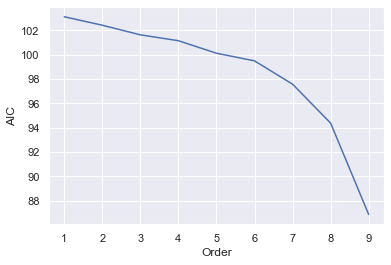

In [17]:
#가장 낮은 p 값 찾기 

sns.set()
plt.plot(list(np.arange(1,10,1)), results_aic)
plt.xlabel("Order")
plt.ylabel("AIC")
plt.show()

In [34]:
#30일간의 예측값 
#태블로 시각화 예정

forecast_songpa = pd.DataFrame(result_songpa.forecast(y= maxlags_songpa, steps=30), index = test.index, columns=['가락동', '거여동', '마천동', '문정동', '방이동', '삼전동', '석촌동', '송파동', '신천동', '오금동','잠실동', '장지동', '풍납동'])

forecast_songpa.head()


,가락동,거여동,마천동,문정동,방이동,삼전동,석촌동,송파동,신천동,오금동,잠실동,장지동,풍납동
대여일자,,,,,,,,,,,,,
"""2022-06-01""",490.681627,142.213249,66.445738,402.647208,175.469104,47.878042,93.950666,81.323441,392.920252,149.532159,257.062205,205.195366,163.921889
"""2022-06-02""",610.927042,38.921178,36.707434,386.614407,957.519675,120.105362,145.385826,308.876249,930.056104,196.692167,1123.829622,102.607602,384.094394
"""2022-06-03""",-83.527275,5.779854,-7.867016,49.619430,149.303119,0.181140,24.781803,36.386211,-80.353556,-92.539128,139.924433,52.122876,148.148542
"""2022-06-04""",-1256.186261,-92.918732,-56.896841,-1114.824453,-1170.188050,-52.881430,-221.429748,-287.311643,-1315.434340,-258.136509,-1301.364069,-292.998194,-509.740651
"""2022-06-05""",-962.131750,-321.415923,-94.179324,-619.207453,-468.197515,-125.536579,-300.111623,-410.787685,-921.766720,-296.856224,-1310.804760,-432.640861,-565.053662


In [35]:
forecast_songpa.to_csv('forecast_songpa.csv')

In [2]:
pip install joblib

  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\sebiy\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [3]:
#pickle
import joblib

joblib.dump(model_songpa, './model_songpapickle.pkl')

c:\Users\sebiy\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<statsmodels.tsa.vector_ar.var_model.LagOrderResults object. Selected orders are: AIC -> 9, BIC -> 0, FPE -> 9, HQIC ->  9>
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 07, Sep, 2022
Time:                     02:01:00
--------------------------------------------------------------------
No. of Equations:         13.0000    BIC:                    118.967
Nobs:                     141.000    HQIC:                   99.9232
Log likelihood:          -7192.42    FPE:                9.01726e+41
AIC:                      86.8867    Det(Omega_mle):     3.32679e+38
--------------------------------------------------------------------
Results for equation 가락동
            coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------
const         23.848133        28.234119            0.845           0.398
L1.가락동        -0.954853         0.392442

['./model_songpapickle.pkl']